## Reading dataset

In [1]:
import numpy as np
import pandas as pd
from text_manipulation import *

plt.style.use('seaborn')

data = pd.read_csv('airline_sentiment_analysis.csv')
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


## Data Preprocessing

Creating instance of class TextProcessing

Data loaded !
2 classes in labels: negative, positive

Checking for null values...
No null values in any feature and label columns of dataset


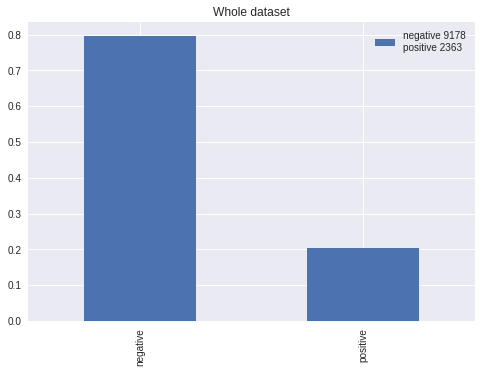

In [2]:
train_preprocess = TextProcessing(data, text_col='text', label_col='airline_sentiment' ,is_training=True)

encoding labels into numeric format like binary/one-hot-code

In [3]:
trained_encode_labels = train_preprocess.encode_labels(using_sklearn_model=True)

creating corpus by cleaning texts

In [4]:
trained_pronoun_token = train_preprocess.create_corpus(use_pronoun_token=False)

Corpus created successfully


#### Let's see corpus created

In [5]:
train_preprocess.view_corpus(text_length_order='DESC')


Label: negative
Original text: @JetBlue I ❤️ Jetblue but i was on flt 277 from fll to sfo. tke off was over 1 hr Late Flight, div to phx &amp; got in 2 hrs Late Flight. What will be done?
Reduced text: i jetblue but i be on flt from fll to sfo tke off be over hr late flight div to phx amp get in hrs late flight what will be do

Label: negative
Original text: @USAirways 4 segments, 4/4 delayed. Gnv &gt; CTL . CTL &gt; JAN . JAN &gt; CTL . CTL &gt; GNV. My year off from flying with you guys was the way to go.
Reduced text: segment delay gnv gt ctl ctl gt jan jan gt ctl ctl gt gnv my year off from fly with you guy be the way to go

Label: negative
Original text: @united Ha… you rebooked me in to an 11 hr layover &amp; are robbing me of a night with my family. Too Late Flight for that. Just fly on time for once.
Reduced text: ha you rebooke me in to an hr layover amp be rob me of a night with my family too late flight for that just fly on time for once

Label: negative
Original text: @USA

Let's see dataframe created in current instance for text-processing

In [6]:
trained_tokenizer, trained_bow_matrix_mode = train_preprocess.create_final_features(final_features='bow_matrix', mode='tfidf')

Matrix using corpora is built with 'tfidf' mode
Total words in corpora: 8675
Shape of bow matrix: (11541, 8676)


In [7]:
class_names = train_preprocess.classes.tolist()

#### Splitting X & y into train & test set

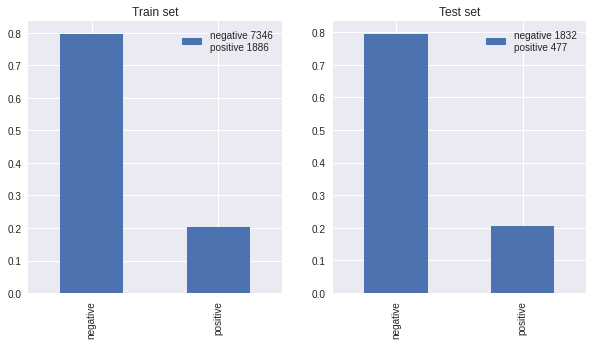

In [8]:
X_train, X_test, y_train, y_test = train_preprocess.split_data(test_size=0.2)

In [9]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (9232, 8676)
Shape of y_train: (9232,)
Shape of X_test: (9232, 8676)
Shape of y_test: (2309,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Fitting different classifier models

#### Logistic Regression Classifier 

In [11]:
LR_classifier = LogisticRegression(max_iter=200, random_state=100)
LR_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=100)

#### Random Forest Classifier

In [12]:
RF_classifier = RandomForestClassifier(random_state=100)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

#### XGBoost Classifier

In [13]:
XGB_classifier = XGBClassifier(random_state=100)
XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix

In [15]:
classifiers = {'Logistic Regression Classifier': LR_classifier, 'Random Forest Classifier':RF_classifier,
               'XGBoost Classifier': XGB_classifier}

### Predictions on our custom input text using trained models

In [16]:
def predict_sentiment(clf_name, texts):
    """Inferencing on any text dataset"""

    data = pd.DataFrame({'text':texts})
    test_preprocess = TextProcessing(data, text_col='text', is_training=False)
    test_preprocess.create_corpus(use_pronoun_token=trained_pronoun_token)
    test_preprocess.create_final_features(trained_tokenizer=trained_tokenizer, final_features='bow_matrix', mode=trained_bow_matrix_mode)
    X = test_preprocess.X
    classifier = classifiers[clf_name]
    results = classifier.predict(X)
    results = trained_encode_labels.inverse_transform(results)
    return results.tolist()

In [17]:
sentences = ["shut up", "yeah fucking amazing", "poor hygiene", "I'm gonna sue you", "it was classy"]

In [18]:
for classifier in classifiers:
    print(classifier)
    print(predict_sentiment(classifier, texts=sentences))
    print()

Logistic Regression Classifier
['negative', 'negative', 'negative', 'negative', 'positive']

Random Forest Classifier
['positive', 'positive', 'negative', 'negative', 'negative']

XGBoost Classifier
['negative', 'positive', 'negative', 'negative', 'negative']



### Brief evaluation using metrics in classification report

In [22]:
for clf_name, classifier in classifiers.items():
    print(f'<<<<<<< {clf_name} >>>>>>>'.center(50))
    print("Train set".center(50))
    train_results = classifier.predict(X_train)
    print(classification_report(y_train, train_results, target_names=class_names))
    print("Test set".center(50))
    test_results = classifier.predict(X_test)
    print(classification_report(y_test, test_results, target_names=class_names))
    print()

  <<<<<<< Logistic Regression Classifier >>>>>>>  
                    Train set                     
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7346
    positive       1.00      0.99      0.99      1886

    accuracy                           1.00      9232
   macro avg       1.00      1.00      1.00      9232
weighted avg       1.00      1.00      1.00      9232

                     Test set                     
              precision    recall  f1-score   support

    negative       0.94      0.95      0.95      1832
    positive       0.80      0.77      0.78       477

    accuracy                           0.91      2309
   macro avg       0.87      0.86      0.86      2309
weighted avg       0.91      0.91      0.91      2309


     <<<<<<< Random Forest Classifier >>>>>>>     
                    Train set                     
              precision    recall  f1-score   support

    negative       1.00      1.00  